In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
present_data = pd.read_csv("data/application_data.csv")

In [17]:
present_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
previous_data = pd.read_csv("data/previous_application.csv")

In [19]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
present_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [21]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [22]:
present_data.isnull().sum().sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_MODE       213514
COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
Length: 122, dtype: int64

In [23]:
# Dropping columns with more than 40% of null values
present_df = present_data.drop(columns = present_data.columns[present_data.isnull().sum()/present_data.shape[0]>.4],axis =1)

In [24]:
present_df.isnull().sum().sort_values()

SK_ID_CURR                         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
                               ...  
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
EXT_SOURCE_3                   60965
OCCUPATION_TYPE                96391
Length: 73, dtype: int64

In [25]:
present_df['OCCUPATION_TYPE']

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507            NaN
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [26]:
present_df['ORGANIZATION_TYPE'].isnull().sum()

0

In [27]:
present_df[['ORGANIZATION_TYPE','OCCUPATION_TYPE']]

,ORGANIZATION_TYPE,OCCUPATION_TYPE
0,Business Entity Type 3,Laborers
1,School,Core staff
2,Government,Laborers
3,Business Entity Type 3,Laborers
4,Religion,Core staff
...,...,...
307506,Services,Sales staff
307507,XNA,NaN
307508,School,Managers
307509,Business Entity Type 1,Laborers


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_GOODS_PRICE'>

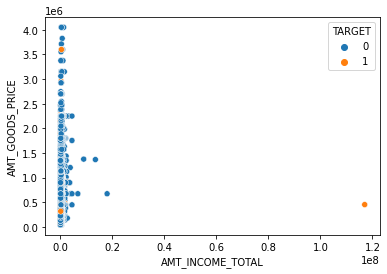

In [41]:
sns.scatterplot(data = present_df,y = 'AMT_GOODS_PRICE' ,x = 'AMT_INCOME_TOTAL')

In [33]:
present_df['AMT_INCOME_TOTAL'].mean()

168797.9192969845

In [34]:
present_df['AMT_INCOME_TOTAL'].mode()

0    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [36]:
present_df['AMT_INCOME_TOTAL'].max()

117000000.0

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

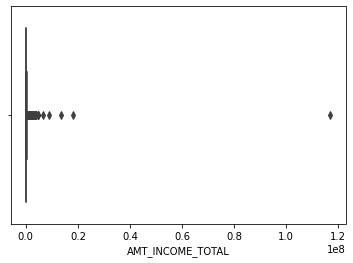

In [37]:
sns.boxplot(data = present_data,x = "AMT_INCOME_TOTAL")

In [38]:
present_df.loc[present_df['AMT_INCOME_TOTAL']==117000000.0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
present_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [43]:
present_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## I have observed that a few clients have an income that is a lot higher than the income of any other client and the other attributes like AMT_CREDIT or AMT_GOODS_PRICE also don't have any visible relation with the huge amount. So I will remove it as it is an outlier.

In [44]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==117000000.0].index,axis = 0,inplace = True)

In [49]:
present_df['AMT_INCOME_TOTAL'].max()

18000090.0

In [50]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==18000090.0].index,axis = 0,inplace = True)

In [51]:
present_df['AMT_INCOME_TOTAL'].max()

13500000.0

In [52]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==13500000.0].index,axis = 0,inplace = True)

In [53]:
present_df['AMT_INCOME_TOTAL'].max()

9000000.0

In [54]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==9000000.0].index,axis = 0,inplace = True)

In [56]:
present_df['AMT_INCOME_TOTAL'].max()

6750000.0

In [57]:
present_df.drop(present_df.loc[present_df['AMT_INCOME_TOTAL']==6750000.0].index,axis = 0,inplace = True)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

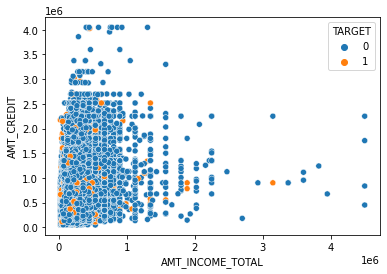

In [58]:
sns.scatterplot(data = present_df,y = 'AMT_CREDIT' ,x = 'AMT_INCOME_TOTAL',hue = 'TARGET')

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

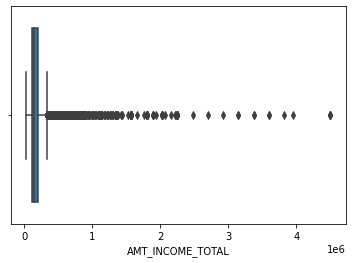

In [60]:
sns.boxplot(data = present_df,x = "AMT_INCOME_TOTAL")